In [1]:
import logging
import numpy as np  
from gensim.models import Doc2Vec
import os
import codecs

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [3]:
model = Doc2Vec.load("/home/laampt/orm/10K/model/vinews_tok_doc650K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r130")

INFO:gensim.utils:loading Doc2Vec object from /home/laampt/orm/10K/model/vinews_tok_doc650K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r130
INFO:gensim.utils:loading docvecs recursively from /home/laampt/orm/10K/model/vinews_tok_doc650K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r130.docvecs.* with mmap=None
INFO:gensim.utils:loading doctag_syn0 from /home/laampt/orm/10K/model/vinews_tok_doc650K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r130.docvecs.doctag_syn0.npy with mmap=None
INFO:gensim.utils:loading syn1neg from /home/laampt/orm/10K/model/vinews_tok_doc650K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r130.syn1neg.npy with mmap=None
INFO:gensim.utils:loading syn0 from /home/laampt/orm/10K/model/vinews_tok_doc650K_dm_5ns_200features_2minwords_8context_e5_casen_cpu_3epo_alpha_r130.syn0.npy with mmap=None
INFO:gensim.utils:setting ignored attribute syn0norm to None
INFO:gensim.utils:setting ignored attribute 

In [4]:
print model

Doc2Vec(dm/s,d200,n5,w8,mc2,s1e-05,t4)


In [5]:
model.init_sims(replace=True)

INFO:gensim.models.word2vec:precomputing L2-norms of word weight vectors


In [6]:
model.docvecs['r130_PD_0'].shape

(200,)

In [7]:
for w,v in model.most_similar([u"phản_động"]):
    print w, v

chống_phá 0.845949828625
tay_sai 0.790350854397
xuyên_tạc 0.789354920387
Việt_Tân 0.770193994045
Cộng_Sản 0.738385736942
bắt_bớ 0.736708343029
VC 0.736540734768
CSVN 0.727030217648
đàn_áp 0.726863980293
cực_đoan 0.726677238941


In [8]:
print model.docvecs['r130_PD_0'].shape
print model.docvecs['r130_ZN_0'].shape
print model.docvecs['r130_TN_0'].shape
print model.docvecs['r130_VN_0'].shape

(200,)
(1, 611075, 200)
(200,)
(200,)


## X,y

In [9]:
N_NUM = 30000
pos_posts = []
for i in range(N_NUM):
    v = model.docvecs["r130_PD_{}".format(i)]
    size = v.shape
    if size[0] == 200: 
        pos_posts.append(v)
    else:
        print i

In [10]:
print len(pos_posts)

30000


In [11]:
neg_posts = []
for i in range(N_NUM):
    v = model.docvecs["r130_TN_{}".format(i)]
    size = v.shape
    if size[0] == 200: 
        neg_posts.append(v)
    else:
        pass

print len(neg_posts)

29987


In [12]:
model.docvecs[u"r130_TN_{}".format(27463)].shape

(1, 611075, 200)

In [13]:
new_doc = u"chúng_tôi là nhà đầu_tư chân_chính"
new_v = model.infer_vector(new_doc.split())
for w,v in model.docvecs.most_similar([new_v]):
    print w,v

INFO:gensim.models.doc2vec:precomputing L2-norms of doc weight vectors


r130_VN_57335 0.516577780247
r130_VN_90678 0.494271606207
r130_VN_94060 0.466949403286
r130_VN_82781 0.465012609959
r130_VN_81874 0.46085870266
r130_TN_277059 0.459780722857
r130_TN_186285 0.459718227386
r130_VN_144810 0.459559768438
r130_VN_169641 0.458737909794
r130_VN_99797 0.455102235079


In [14]:
N_TRAIN = 25000
X = np.vstack((np.array(pos_posts[:N_TRAIN]), np.array(neg_posts[:N_TRAIN])))
y = np.hstack((np.ones(N_TRAIN), np.zeros(N_TRAIN)))

print X.shape, y.shape

(50000, 200) (50000,)


In [15]:
X_test = np.vstack((np.array(pos_posts[N_TRAIN:]), np.array(neg_posts[N_TRAIN:])))
y_test = np.hstack((np.ones(len(pos_posts) - N_TRAIN), np.zeros(len(neg_posts) - N_TRAIN)))
print X_test.shape, y_test.shape

(9987, 200) (9987,)


## EDA

In [16]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

import seaborn as sns

In [17]:
columns = ["D_{:02d}".format(i+1) for i in range(200)]
df = pd.DataFrame.from_records(X, columns=columns)

In [18]:
df.head()

,D_01,D_02,D_03,D_04,D_05,D_06,D_07,D_08,D_09,D_10,D_11,D_12,D_13,D_14,D_15,D_16,D_17,D_18,D_19,D_20,D_21,D_22,D_23,D_24,D_25,D_26,D_27,D_28,D_29,D_30,D_31,D_32,D_33,D_34,D_35,D_36,D_37,D_38,D_39,D_40,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_67,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_85,D_86,D_87,D_88,D_89,D_90,D_91,D_92,D_93,D_94,D_95,D_96,D_97,D_98,D_99,D_100,D_101,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_146,D_147,D_148,D_149,D_150,D_151,D_152,D_153,D_154,D_155,D_156,D_157,D_158,D_159,D_160,D_161,D_162,D_163,D_164,D_165,D_166,D_167,D_168,D_169,D_170,D_171,D_172,D_173,D_174,D_175,D_176,D_177,D_178,D_179,D_180,D_181,D_182,D_183,D_184,D_185,D_186,D_187,D_188,D_189,D_190,D_191,D_192,D_193,D_194,D_195,D_196,D_197,D_198,D_199,D_200
0,-0.020711,-0.010908,0.011048,0.005256,0.001254,0.004994,0.000188,-0.004080,0.002296,-0.008972,-0.002540,-0.001664,0.001510,-0.006058,0.011620,0.017279,-0.002641,0.012268,-0.002049,0.017433,-0.002882,0.010169,0.001681,-0.003930,-0.007222,-0.010929,-0.000679,-0.006216,-0.006287,-0.008706,-0.006815,0.004545,-0.002626,0.014271,0.003439,0.003086,0.014368,-0.011258,-0.002110,0.008826,0.003841,0.005725,-0.006940,-0.004893,-0.008500,-0.003238,-0.014929,0.006349,0.009426,0.015963,0.000208,-0.015507,-0.009495,-0.003247,-0.019089,-0.005795,0.000817,-0.009689,0.024564,-0.010256,-0.006992,0.011701,0.016310,-0.006188,0.002535,-0.003758,0.006530,0.000984,-0.013721,-0.013338,-0.004682,-0.023410,0.004184,0.015514,0.006055,0.032048,0.023130,-0.001575,0.020563,-0.018696,-0.012815,-0.002943,-0.002194,0.000582,-0.001113,-0.001807,-0.021432,0.012335,0.014488,0.009544,0.016931,0.003575,-0.005813,0.006800,-0.008200,0.001292,-0.009491,0.004500,0.009462,-0.008508,-0.002686,0.005247,0.006644,0.008567,0.001579,-0.005978,0.003497,-0.005545,-0.010365,0.001690,0.012422,0.006251,-0.012908,-0.000720,0.006797,0.002734,-0.005093,0.017582,-0.000108,0.004886,0.008225,0.028014,0.015903,-0.016080,0.017876,0.015208,0.011807,0.007664,-0.007768,-0.003378,-0.016603,0.008090,-0.011222,-0.002099,-0.003401,0.002897,-0.007854,0.012245,-0.003613,0.005836,0.000374,-0.026221,-0.002345,0.003285,-0.007250,-0.006976,0.017891,0.023812,0.005661,-0.001830,-0.015680,0.006009,-0.002380,-0.001497,0.015800,-0.002700,0.009096,-0.000621,0.009976,0.005848,0.022935,-0.008167,0.013510,0.003108,0.001009,0.021497,0.002979,0.009525,0.005308,-0.005290,0.010590,0.010514,0.012044,0.005596,0.003124,0.003357,-0.017312,-0.024698,0.005947,-0.015787,-0.001156,0.011178,-0.002116,-0.000676,-0.008728,-0.021973,0.009450,0.000816,0.003801,0.014841,-0.004219,-0.004580,-0.003491,-0.005207,0.001376,-0.000443,0.005828,0.000545,-0.000080,0.006550
1,-0.011903,0.001381,0.008066,0.002519,0.005855,0.017650,-0.005544,0.006717,0.012838,-0.005788,0.002782,0.002821,-0.002109,0.001413,-0.001706,0.007832,0.005023,-0.001682,-0.005525,0.009532,0.003019,0.012755,0.011915,-0.004978,-0.004677,-0.005578,-0.006102,0.006041,-0.015562,-0.002630,0.001603,0.008160,0.002623,-0.008965,0.012580,0.020413,-0.034535,-0.014785,-0.019211,0.014252,0.008393,0.004525,-0.012764,-0.019405,0.002278,0.008850,-0.011866,0.012223,-0.007055,0.017412,-0.000619,-0.003793,-0.005651,-0.003143,-0.014217,-0.009743,0.018981,-0.005172,0.015031,-0.003095,-0.000613,0.001933,-0.004686,0.000239,-0.001601,0.003856,-0.001042,0.003127,0.006146,0.003089,0.004835,-0.017107,-0.001673,-0.011691,-0.003278,0.025680,-0.013305,-0.001812,-0.006554,-0.014977,-0.003824,0.009384,-0.008841,0.007670,-0.000173,0.015818,-0.009161,-0.001223,0.012830,-0.005245,0.032514,-0.004505,0.005551,0.015900,0.004430,0.009895,0.007696,0.004700,0.012219,-0.015421,-0.000812,0.001949,0.016034,0.003888,-0.015187,-0.

In [19]:
df.describe()

,D_01,D_02,D_03,D_04,D_05,D_06,D_07,D_08,D_09,D_10,D_11,D_12,D_13,D_14,D_15,D_16,D_17,D_18,D_19,D_20,D_21,D_22,D_23,D_24,D_25,D_26,D_27,D_28,D_29,D_30,D_31,D_32,D_33,D_34,D_35,D_36,D_37,D_38,D_39,D_40,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_67,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_85,D_86,D_87,D_88,D_89,D_90,D_91,D_92,D_93,D_94,D_95,D_96,D_97,D_98,D_99,D_100,D_101,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_146,D_147,D_148,D_149,D_150,D_151,D_152,D_153,D_154,D_155,D_156,D_157,D_158,D_159,D_160,D_161,D_162,D_163,D_164,D_165,D_166,D_167,D_168,D_169,D_170,D_171,D_172,D_173,D_174,D_175,D_176,D_177,D_178,D_179,D_180,D_181,D_182,D_183,D_184,D_185,D_186,D_187,D_188,D_189,D_190,D_191,D_192,D_193,D_194,D_195,D_196,D_197,D_198,D_199,D_200
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-0.000356,0.012928,0.006357,0.011358,-0.005631,0.003117,0.001653,0.002094,0.004018,-0.005942,0.002057,0.009234,-0.010727,0.000417,0.003531,0.005938,-0.004236,0.004952,-0.005945,0.003275,-0.008603,-0.000639,0.007880,0.002984,-0.002257,-0.000129,0.001605,0.000062,0.006501,0.006092,-0.0009

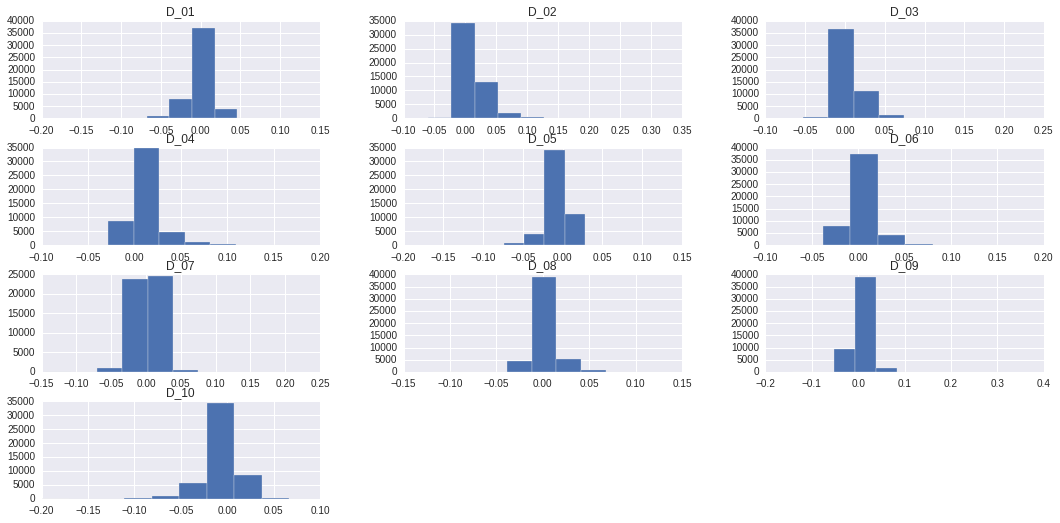

In [20]:
df[columns[:10]].hist(figsize=(16,8))
plt.show()

## Model

In [21]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

> Train on X

In [22]:
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))

Random Forest Classifier:      0.98


In [23]:
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Logistic Regression:           0.99


In [24]:
lr = linear_model.LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [25]:
print lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


In [26]:
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y_test, lr.predict(X_test))))

Logistic Regression:
              precision    recall  f1-score   support

        0.0       1.00      0.97      0.99      4987
        1.0       0.97      1.00      0.99      5000

avg / total       0.99      0.99      0.99      9987




In [27]:
rf = ensemble.RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
print rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


> Test on X_test

In [29]:
print('Random Forest:\n {}\n'.format(metrics.classification_report(y_test, rf.predict(X_test))))

Random Forest:
              precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      4987
        1.0       0.99      0.99      0.99      5000

avg / total       0.99      0.99      0.99      9987




In [30]:
test_doc = u"""Mục_tiêu cao nhất trong cuộc_đấu tranh_giành tự_do dân_chủ cho Dân_tộc hôm_nay là làm cho thể_chế chính_trị ở Việt_Nam hiện_nay phải bị thay_thế triệt_để chứ không phải được đổi_mới từng phần hay điều_chỉnh vặt_vãnh như đang xảy ra Cụ_thể là phải chuyển từ thể_chế chính_trị nhất_nguyên độc đảng không có cạnh_tranh trên chính_trường hiện_nay sang thể_chế chính_trị đa_nguyên đa_đảng có cạnh_tranh lành_mạnh phù_hợp với những đòi_hỏi chính_đáng của Đất_nước trong đó hệ_thống tam_quyền Lập_pháp Hành_pháp Tư_pháp phải được phân_lập rõ_ràng phù_hợp với các tiêu_chuẩn quốc_tế và trải_nghiệm của Nhân_loại qua những nền dân_chủ đắt giá và đầy thành_tựu _NUM"""
test_vec = model.infer_vector(test_doc.split())
is_black_lr = lr.predict(test_vec)
is_black_rf = rf.predict(test_vec)
print u"""{} \n\n >> is [{}] by Logistic Regression and [{}] by Random Forest""".format(test_doc,is_black_lr, is_black_rf)

Mục_tiêu cao nhất trong cuộc_đấu tranh_giành tự_do dân_chủ cho Dân_tộc hôm_nay là làm cho thể_chế chính_trị ở Việt_Nam hiện_nay phải bị thay_thế triệt_để chứ không phải được đổi_mới từng phần hay điều_chỉnh vặt_vãnh như đang xảy ra Cụ_thể là phải chuyển từ thể_chế chính_trị nhất_nguyên độc đảng không có cạnh_tranh trên chính_trường hiện_nay sang thể_chế chính_trị đa_nguyên đa_đảng có cạnh_tranh lành_mạnh phù_hợp với những đòi_hỏi chính_đáng của Đất_nước trong đó hệ_thống tam_quyền Lập_pháp Hành_pháp Tư_pháp phải được phân_lập rõ_ràng phù_hợp với các tiêu_chuẩn quốc_tế và trải_nghiệm của Nhân_loại qua những nền dân_chủ đắt giá và đầy thành_tựu _NUM 

 >> is [[ 1.]] by Logistic Regression and [[ 1.]] by Random Forest


In [31]:
test_doc = u"""Các nhà đối_kháng dân_chủ tiếp_tục bị hăm_dọa sách_nhiễu tống_ngục chỉ vì dám lên_tiếng phê_phán những sai_lầm và tố_cáo những tội_ác của nhà cầm_quyền Cộng_sản Điển_hìn
h là nhà_báo tự_do Nguyễn Hoàng Hải tiếp_tục bị giam sau khi mãn án_tù và nay biệt vô âm_tín giáo_sư hồi_hương Phạm Minh Hoàng bị án _NUM năm vừa mới được giảm luật_gia 
dân_chủ Cù Huy Hà Vũ phúc_thẩm y_án _NUM năm tù nhà_báo tự_do Tạ Phong Tần bị bắt_cóc tháng _NUM chiến_sĩ dân oan Hồ Thị Bích Khương bị giam tù lần _NUM từ ngày _NUM và 
xử ngày _NUM nhà_văn dân_chủ Huỳnh Ngọc Tuấn cùng với hai người con là Huỳnh Thục Vy Huỳnh Trọng Hiếu bị soát nhà cướp của phạt tiền hăm_dọa quản_chế từ _NUM
Các công_dân yêu nước xuống đường để phản_đối Tàu cộng xâm_lược Tổ_quốc nhiều mặt qua _NUM cuộc biểu_tình kể từ tháng _NUM hoặc để ủng_hộ việc ra luật biểu_tình ngày _NU
M thì bị vu_khống đấm_đá như anh Nguyễn Chí Đức hăm_dọa đuổi_học đuổi việc như anh Nguyễn Văn_Phương tước tài_sản lăng_nhục đưa về Trại phục_hồi nhân_phẩm như anh Bùi Th
anh Hiếu Có trường_hợp bị phá gia_cư đưa vào nhà_tù trá_hình cơ_sở giáo_dục như chị Bùi Thị Minh Hằng từ ngày _NUM"""
test_vec = model.infer_vector(test_doc.split())
is_black_lr = lr.predict(test_vec)
is_black_rf = rf.predict(test_vec)
print u"""{} \n\n >> is [{}] by Logistic Regression and [{}] by Random Forest""".format(test_doc,is_black_lr, is_black_rf)

Các nhà đối_kháng dân_chủ tiếp_tục bị hăm_dọa sách_nhiễu tống_ngục chỉ vì dám lên_tiếng phê_phán những sai_lầm và tố_cáo những tội_ác của nhà cầm_quyền Cộng_sản Điển_hìn
h là nhà_báo tự_do Nguyễn Hoàng Hải tiếp_tục bị giam sau khi mãn án_tù và nay biệt vô âm_tín giáo_sư hồi_hương Phạm Minh Hoàng bị án _NUM năm vừa mới được giảm luật_gia 
dân_chủ Cù Huy Hà Vũ phúc_thẩm y_án _NUM năm tù nhà_báo tự_do Tạ Phong Tần bị bắt_cóc tháng _NUM chiến_sĩ dân oan Hồ Thị Bích Khương bị giam tù lần _NUM từ ngày _NUM và 
xử ngày _NUM nhà_văn dân_chủ Huỳnh Ngọc Tuấn cùng với hai người con là Huỳnh Thục Vy Huỳnh Trọng Hiếu bị soát nhà cướp của phạt tiền hăm_dọa quản_chế từ _NUM
Các công_dân yêu nước xuống đường để phản_đối Tàu cộng xâm_lược Tổ_quốc nhiều mặt qua _NUM cuộc biểu_tình kể từ tháng _NUM hoặc để ủng_hộ việc ra luật biểu_tình ngày _NU
M thì bị vu_khống đấm_đá như anh Nguyễn Chí Đức hăm_dọa đuổi_học đuổi việc như anh Nguyễn Văn_Phương tước tài_sản lăng_nhục đưa về Trại phục_hồi nhân_phẩm như anh

## Eva

In [32]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
logistic_reg_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))

conf_matrix = {
                1: {
                    'matrix': random_forest_conf_matrix,
                    'title': 'Random Forest',
                   },
                2: {
                    'matrix': logistic_reg_conf_matrix,
                    'title': 'Logistic Regression',
                   }               
}

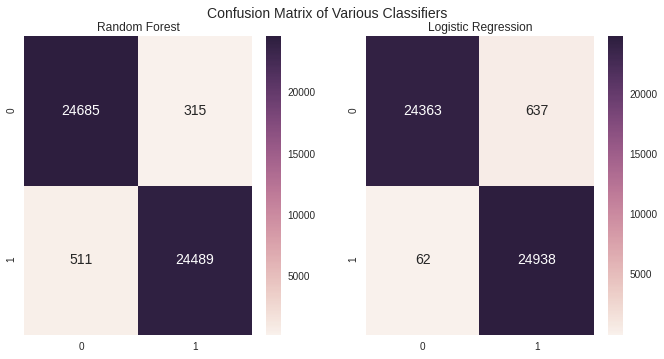

In [33]:
fix, ax = plt.subplots(figsize=(10, 5))
plt.suptitle('Confusion Matrix of Various Classifiers')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(1, 2, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');

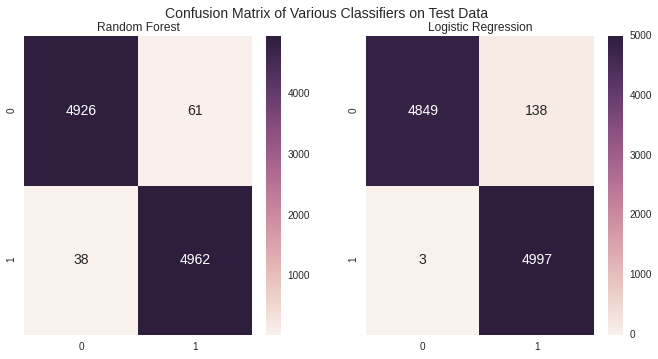

In [34]:
random_forest_conf_matrix_test = metrics.confusion_matrix(y_test, rf.predict(X_test) )
logistic_reg_conf_matrix_test = metrics.confusion_matrix(y_test, lr.predict(X_test))

conf_matrix_test = {
                1: {
                    'matrix': random_forest_conf_matrix_test,
                    'title': 'Random Forest',
                   },
                2: {
                    'matrix': logistic_reg_conf_matrix_test,
                    'title': 'Logistic Regression',
                   }               
}

fix, ax = plt.subplots(figsize=(10, 5))
plt.suptitle('Confusion Matrix of Various Classifiers on Test Data')
for ii, values in conf_matrix_test.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(1, 2, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');